In [1]:
# once i have wholegenome_offset.trees
import pandas as pd

import random
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import os
import pandas as pd
import glob

from data_for_plots import her_dict, sel_dict, poly_dict, freq_dict, optima_dict, freq_order, sel_order, optima_order, poly_h2_order, poly_order, freq_optima_order,heritability_order

import itertools

In [2]:
path2 = '/home/tbellagio/simulations/to_transfer/'
#'/home/tbellagio/scratch/slim_grenenet4gen/slim_grenenet/'

pop_size = pd.read_csv(path2 + 'vfitnes_oct29.csv',  index_col=[0])

pop_size = pop_size.reset_index()

In [3]:
pop_size = pop_size.fillna(0)

In [4]:
path = '/home/tbellagio/scratch/slim_grenenet/results/'

In [5]:
pop_size = pop_size.reset_index()

In [6]:
pop_size_monogen = [i for i in pop_size['index'] if 'onehpoly' in i]

In [7]:
pop_size_monogen = pop_size[pop_size['index'].isin(pop_size_monogen)]

In [8]:
arq = pop_size_monogen['index'].str.split('results').str[1].str.split('/').str[1].unique()

In [9]:
pop_size_monogen['arq'] = pop_size_monogen['index'].str.split('results').str[1].str.split('/').str[1]

/tmp/ipykernel_183881/4132146492.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pop_size_monogen['arq'] = pop_size_monogen['index'].str.split('results').str[1].str.split('/').str[1]


In [10]:
pop_size_monogen['index'] = pop_size_monogen['index'].str.split('/subp').str[0]

pop_size_monogen['optima'] = pop_size_monogen['index'].str.split('/').str[-1]

pop_size_monogen['sel'] = pop_size_monogen['index'].str.split('/').str[-2]

pop_size_monogen['h2'] = pop_size_monogen['index'].str.split('/').str[-3]

pop_size_monogen['freq'] = pop_size_monogen['index'].str.split('_').str[-3]

pop_size_monogen['poly'] = pop_size_monogen['index'].str.split('_').str[-2]

pop_size_monogen['rep'] = pop_size_monogen['index'].str.split('_').str[-1].str.split('/').str[0]

pop_size_monogen = pop_size_monogen.drop('index',axis=1)

## maybe is a good idea to replace optima by extreme, mod and intermediate? 

pop_size_monogen = pop_size_monogen.replace({'optima-2': 'ex', 'optima-1': 'me', 'optima0': 'int', 'optima1': 'me', 'optima2': 'ex'})

/tmp/ipykernel_183881/108051242.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pop_size_monogen['index'] = pop_size_monogen['index'].str.split('/subp').str[0]
/tmp/ipykernel_183881/108051242.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pop_size_monogen['optima'] = pop_size_monogen['index'].str.split('/').str[-1]
/tmp/ipykernel_183881/108051242.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead


In [11]:
sel_order = sel_order[2:]

In [12]:
pop_size_monogen = pop_size_monogen[pop_size_monogen['sel'].isin(['estrongsel', 'exstrongsel'])]

In [13]:
pop_size_monogen = pop_size_monogen.replace(poly_dict).replace(sel_dict).replace(her_dict).replace(freq_dict).replace(optima_dict)

pop_size_monogen = pop_size_monogen.replace(poly_dict).replace(sel_dict).replace(her_dict).replace(freq_dict).replace(optima_dict)

In [14]:
pop_size_monogen = pop_size_monogen.drop(['level_0', 'arq', 'poly'],axis=1)

In [15]:
selected_columns = ['optima','sel','h2','freq', 'rep']
melted_pop_size_monogen = pop_size_monogen.melt(selected_columns, var_name='generation', value_name='pop_size')

In [16]:
sel_dict

{'moderatesel': 'Moderate Selection (Va = 1)',
 'strongsel': 'Strong Selection (Va = 0.1)',
 'estrongsel': 'Very Strong Selection (Va = 0.01)',
 'exstrongsel': 'Extreme Selection (Va = 0.001)'}

In [17]:
heritability_order = ['heritability 0.9', 'heritability 0.5', 'heritability 0.1']

In [18]:
melted_pop_size_monogen_ce = melted_pop_size_monogen[melted_pop_size_monogen['optima'] == 'Common environments'] 

In [19]:
custom_categories = sel_order
custom_colors = sns.color_palette("Reds", n_colors=len(custom_categories))

# Create a custom color dictionary
custom_color_dict = dict(zip(sel_order, custom_colors))

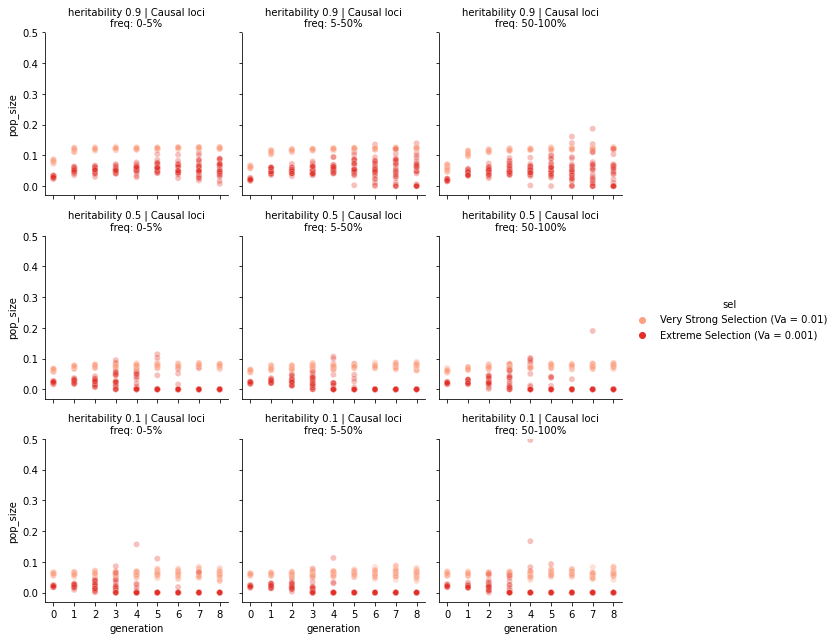

In [20]:
g = sns.relplot(data=melted_pop_size_monogen_ce, x="generation", y="pop_size", hue="sel", col="freq", row="h2",
                alpha=0.3,
                row_order = heritability_order,
                palette=custom_color_dict,
                hue_order=sel_order,
                col_order = freq_order,
                height=3,  # Set the height of each subplot
                aspect=1
                
           )
g.set_titles(row_template = '{row_name}', col_template = '{col_name}')
g.set(ylim=(-0.03, 0.5))
#g.savefig("plots/polygenic_common_env_pop_size_over_time.png")
plt.show()

In [21]:
melted_pop_size_monogen_ie = melted_pop_size_monogen[melted_pop_size_monogen['optima'] == 'Intermediate environments'] 

In [22]:
custom_categories = sel_order
custom_colors = sns.color_palette("Reds", n_colors=len(custom_categories))

# Create a custom color dictionary
custom_color_dict = dict(zip(sel_order, custom_colors))

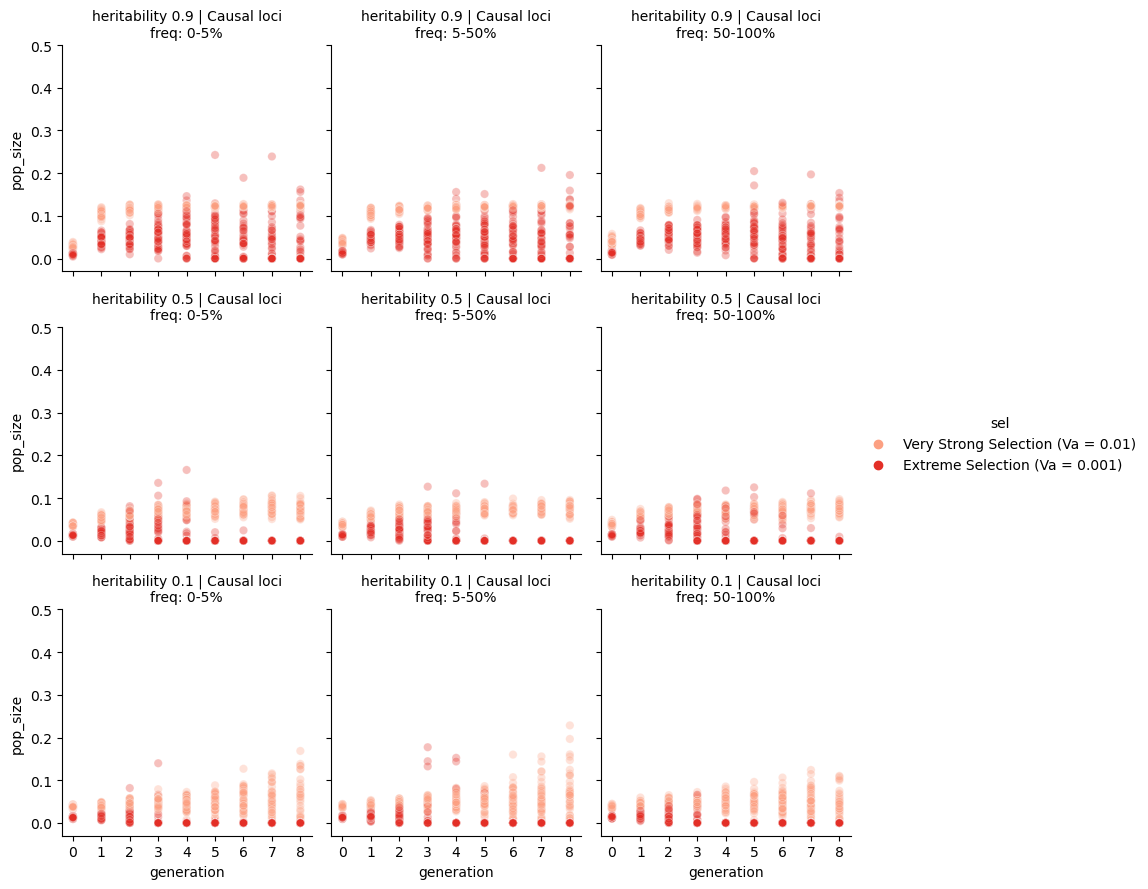

In [23]:
g = sns.relplot(data=melted_pop_size_monogen_ie, x="generation", y="pop_size", hue="sel", col="freq", row="h2",
                alpha=0.3,
                row_order = heritability_order,
                palette=custom_color_dict,
                hue_order=sel_order,
                col_order = freq_order,
                height=3,  # Set the height of each subplot
                aspect=1
                
           )
g.set_titles(row_template = '{row_name}', col_template = '{col_name}')
g.set(ylim=(-0.03, 0.5))
#g.savefig("plots/polygenic_int_env_pop_size_over_time.png")
plt.show()

In [24]:
melted_pop_size_monogen_ee = melted_pop_size_monogen[melted_pop_size_monogen['optima'] == 'Extreme environments'] 

In [25]:
custom_categories = sel_order
custom_colors = sns.color_palette("Reds", n_colors=len(custom_categories))

# Create a custom color dictionary
custom_color_dict = dict(zip(sel_order, custom_colors))

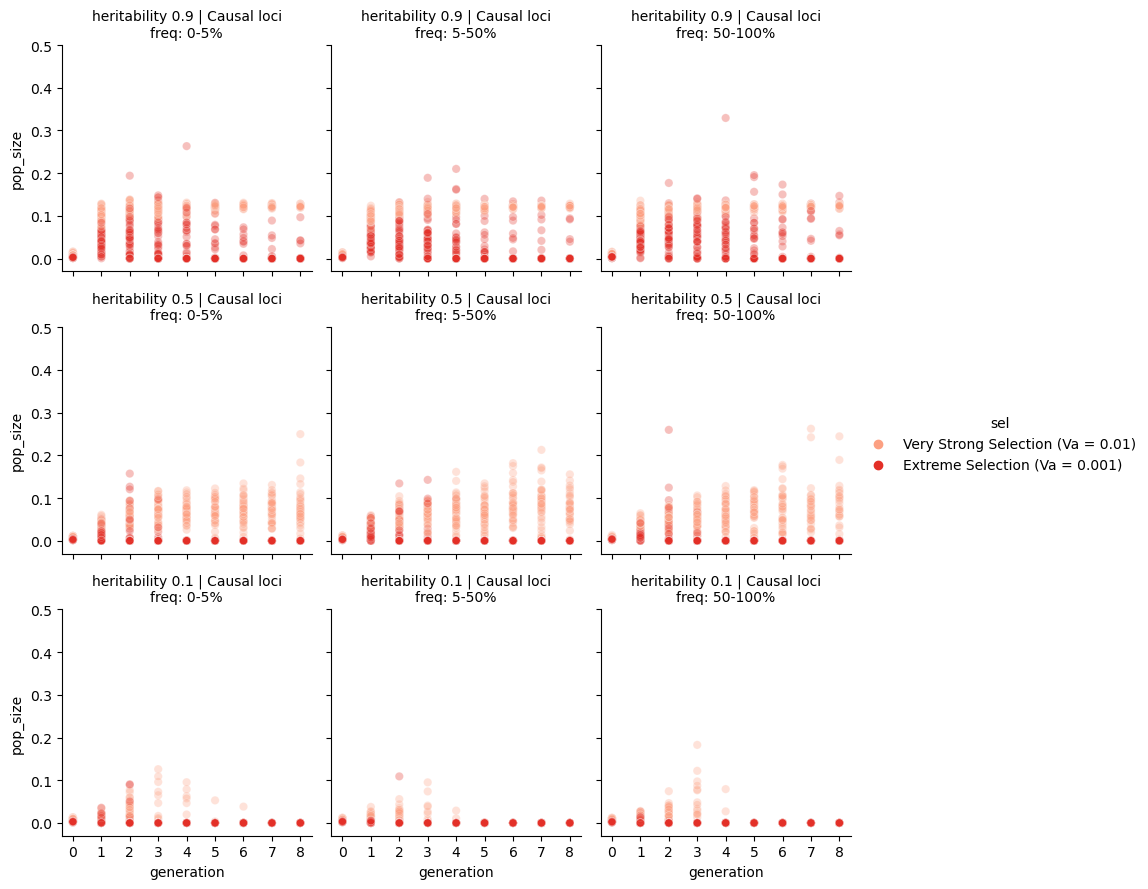

In [26]:
g = sns.relplot(data=melted_pop_size_monogen_ee, x="generation", y="pop_size", hue="sel", col="freq", row="h2",
                alpha=0.3,
                row_order = heritability_order,
                palette=custom_color_dict,
                hue_order=sel_order,
                col_order = freq_order,
                height=3,  # Set the height of each subplot
                aspect=1
                
           )
g.set_titles(row_template = '{row_name}', col_template = '{col_name}')
g.set(ylim=(-0.03, 0.5))
#g.savefig("plots/polygenic_ex_env_pop_size_over_time.png")
plt.show()